##ASSIGNMENT-2

##AGGLOMERATIVE HIERARCHICAL CLUSTERING (AHC):

Importing the required packages:

In [333]:
import numpy as np
import pandas as pd 
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

Loading and Preparing the Datasets:

In [258]:
data_df = pd.read_table('ncidata.txt',header=None,delim_whitespace=True)
data_df_t = data_df.T
data_np = data_df_t.to_numpy()

Class for AHC:

In [325]:
class AHC():
    
    def __init__(self,data):
        
        self.root=None
        self.n_clust = data.shape[0]
        
    def Euc_dist(self,data):
        d_mat = euclidean_distances(data, data)
        d_mat = np.tril(d_mat)
        d_mat[d_mat == 0] = np.inf
        return d_mat
    
    def single_link(self,data):
        #This function implements AHC using single linkage, where the minimum value is considered
        left=[] #This list stores all the left nodes
        right=[] #This list stores all the right nodes
        l1=[] #This list stores all the heights
        l2=[]
        dendro_s = {}
        obs = {}

        d_mat=self.Euc_dist(data)  #The distances are calcuated in the distance matrix using the 
        #Euclidean Distance formula
        df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf)
        #Creating a dataframe with the shape of dataset where values are positive infinite

        for i in range(0,self.n_clust):
                ij = np.unravel_index(d_mat.argmin(), d_mat.shape)
                low_vals = np.min(d_mat)
            
                l1.append(low_vals)
                if i == 0:
                    df.iloc[ij[0]] = 0
                    df.iloc[ij[1]] = 0
                    l1.append(0)
                else:
                    try:
                        a = int(df.iloc[ij[0]])
                    except:
                        df.iloc[ij[0]] = i
                        a = i
                    try:
                        b = int(df.iloc[ij[1]])
                    except:
                        df.iloc[ij[1]] = i
                        b = i
                    df[(df[0]==a) | (df[0]==b)] = i
                if i<2 :    
                    obs[i] = ij 
                    left.append(ij[0])
                    right.append(ij[1])
                else:
                    if a in obs :
                        obs[i] = obs[a],ij[1]
                        left.append(obs[a])
                        right.append(ij[1])
                    elif b in obs:
                        obs[i] = ij[0],obs[b]
                        left.append(ij[0])
                        right.append(obs[b])
                    else:
                        obs[i] = ij  
                        left.append(ij[0])
                        right.append(ij[1])
                
                dendro_s[i] = ij
                for j in range(0, ij[0]):
                    if np.isfinite(d_mat[ij[0]][j]) and np.isfinite(d_mat[ij[1]][j]):
                        d_mat[ij[1]][j] = min(d_mat[ij[0]][j], d_mat[ij[1]][j])
                        #As it is Single linkage, the minimum value is considered
                d_mat[ij[0]] = np.inf 
        
        l1.pop(-1)
        print("Values for height from bottom node to root node:")
        print(l1)
        print("Left nodes:")
        print(left)
        print("Right nodes:")
        print(right)
        
        print("Dendrogram:")
        print(obs)
        
        return dendro_s
    
    def comp_link(self,data):
        #This function implements AHC using complete linkage, where the maximum value is considered
        left=[] #This list stores all the left nodes
        right=[] #This list stores all the right nodes
        l1=[] #This list stores all the heights
        l2=[]
        dendro_comp = {}
        obs = {}

        d_mat=self.Euc_dist(data)
        df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf)
        for i in range(0,self.n_clust):
            ij = np.unravel_index(d_mat.argmin(), d_mat.shape)
            low_vals = np.min(d_mat)
            
            l1.append(low_vals)
            if i == 0:
                df.iloc[ij[0]] = 0
                df.iloc[ij[1]] = 0
                l1.append(0)
            else:
                try:
                    a = int(df.iloc[ij[0]])
                except:
                    df.iloc[ij[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij[1]])
                except:
                    df.iloc[ij[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            if i<2 :    
                obs[i] = ij
                left.append(ij[0])
                right.append(ij[1])
            else:
                if a in obs :
                    obs[i] = obs[a],ij[1]
                    left.append(obs[a])
                    right.append(ij[1])
                elif b in obs:
                    obs[i] = ij[0],obs[b]
                    left.append(ij[0])
                    right.append(obs[b])
                else:
                    obs[i] = ij    
                    left.append(ij[0])
                    right.append(ij[1])
            dendro_comp[i] = ij
            for j in range(0, ij[0]):
                if np.isfinite(d_mat[ij[0]][j]) and np.isfinite(d_mat[ij[1]][j]):
                    d_mat[ij[1]][j] = max(d_mat[ij[0]][j], d_mat[ij[1]][j]) 
                    #As it is Complete linkage, the maximum value is considered
            d_mat[ij[0]] = np.inf 
        
        l1.pop(-1)
        print("Values for height from bottom node to root node:")
        print(l1)
        print("Left nodes:")
        print(left)
        print("Right nodes:")
        print(right)
        
        print("Dendrogram:")
        print(obs)   
        
        return dendro_comp
        
    def aver_link(self,data):
        #This function implements AHC using average linkage, where the average value is considered
        left=[] #This list stores all the left nodes
        right=[] #This list stores all the right nodes
        l1=[] #This list stores all the heights
        l2=[]
        dendro_av = {}
        obs = {}
        d_mat=self.Euc_dist(data)
        df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf)
        for i in range(0,self.n_clust):
            ij = np.unravel_index(d_mat.argmin(), d_mat.shape)
            low_vals = np.min(d_mat)
            
            l1.append(low_vals)
            if i == 0:
                df.iloc[ij[0]] = 0
                df.iloc[ij[1]] = 0
                l1.append(0)
            else:
                try:
                    a = int(df.iloc[ij[0]])
                except:
                    df.iloc[ij[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij[1]])
                except:
                    df.iloc[ij[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            if i<2 :    
                obs[i] = ij
                left.append(ij[0])
                right.append(ij[1])
            else:
                if a in obs :
                    obs[i] = obs[a],ij[1]
                    left.append(obs[a])
                    right.append(ij[1])
                elif b in obs:
                    obs[i] = ij[0],obs[b]
                    left.append(ij[0])
                    right.append(obs[b])
                else:
                    obs[i] = ij
                    left.append(ij[0])
                    right.append(ij[1])
            dendro_av[i] = ij
            for j in range(0, ij[0]):
                if np.isfinite(d_mat[ij[0]][j]) and np.isfinite(d_mat[ij[1]][j]):
                    d_mat[ij[1]][j] = (d_mat[ij[0]][j] + d_mat[ij[1]][j])/2.0  
                    #As it is Average linkage, the average value is considered
            d_mat[ij[0]] = np.inf 
        
        
        l1.pop(-1)
        print("Values for height from bottom node to root node:")
        print(l1)
        print("Left nodes:")
        print(left)
        print("Right nodes:")
        print(right)
        
        print("Dendrogram:")
        print(obs)

        return dendro_av 
    
    def centr_link(self,data):
        #This function implements AHC using centroid linkage, where the median value is considered
        left=[] #This list stores all the left nodes
        right=[] #This list stores all the right nodes
        l1=[] #This list stores all the heights
        l2=[]
        dendro_centr = {}
        obs = {}
        d_mat=self.Euc_dist(data)
        df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf)
        for i in range(0,self.n_clust):
            ij = np.unravel_index(d_mat.argmin(), d_mat.shape)
            low_vals = np.min(d_mat)
            
            l1.append(low_vals)
            if i == 0:
                df.iloc[ij[0]] = 0
                df.iloc[ij[1]] = 0
                l1.append(0)
            else:
                try:
                    a = int(df.iloc[ij[0]])
                except:
                    df.iloc[ij[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij[1]])
                except:
                    df.iloc[ij[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            if i<2 :    
                obs[i] = ij
                left.append(ij[0])
                right.append(ij[1])
            else:
                if a in obs :
                    obs[i] = obs[a],ij[1]
                    left.append(obs[a])
                    right.append(ij[1])
                elif b in obs:
                    obs[i] = ij[0],obs[b]
                    left.append(ij[0])
                    right.append(obs[b])
                else:
                    obs[i] = ij
                    left.append(ij[0])
                    right.append(ij[1])
            dendro_centr[i] = ij
            for j in range(0, ij[0]):
                d=[]
                if np.isfinite(d_mat[ij[0]][j]) and np.isfinite(d_mat[ij[1]][j]):
                    d.append(d_mat[ij[0]][j])
                    d.append(d_mat[ij[1]][j])
                    d_mat[ij[1]][j] = np.median(d)         
                    #As it is Centroid linkage, the median value is considered
            d_mat[ij[0]] = np.inf 
        
        
        l1.pop(-1)
        print("Values for height from bottom node to root node:")
        print(l1)
        print("Left nodes:")
        print(left)
        print("Right nodes:")
        print(right)
        
        print("Dendrogram:")
        print(obs)

        return dendro_centr   

a)

Below is the Dendrogram data structure for:

In [327]:
a=AHC(data_np)

Single Linkage:

In [328]:
single=a.single_link(data_np)

Values for height from bottom node to root node:
[38.230332665099624, 0, 38.596041661581594, 39.10562478531761, 45.1515809571716, 45.353381294417616, 45.44295228455796, 51.43823072874993, 56.78015373222958, 56.96831086560754, 57.9172637924558, 60.3505227083712, 60.49650657012727, 60.80441099581336, 61.5542532619369, 61.63750361658014, 61.92928070280463, 62.17805940041747, 62.42947288420524, 63.42863148528139, 63.745877888624605, 64.1922273243778, 64.37262205639715, 65.12892102156242, 65.28264431813801, 65.29849226098818, 65.51449609704083, 65.70067054382505, 65.77106679501917, 65.93814644245526, 66.48708072343938, 66.9087797281852, 67.83789247908614, 68.20511741691331, 68.58009711229788, 68.81308416013593, 69.02726291794751, 69.93409617673039, 69.98455840670995, 70.5172849516473, 70.62273230710422, 70.93759619159013, 71.27390115422867, 71.74470569620722, 71.74485011867317, 71.8296491657112, 72.8503483188853, 73.56083029371352, 74.00465691447778, 74.90674331908507, 76.67936684081806, 77

Complete Linkage:

In [329]:
complete=a.comp_link(data_np)

Values for height from bottom node to root node:
[38.230332665099624, 0, 39.10562478531761, 39.999898758858755, 45.1515809571716, 45.353381294417616, 45.44295228455796, 51.43823072874993, 56.78015373222958, 57.9172637924558, 60.3505227083712, 60.49650657012727, 60.80441099581336, 61.5542532619369, 61.63750361658014, 61.92928070280463, 62.17805940041747, 62.78163257503814, 63.67441112006138, 63.745877888624605, 65.12892102156242, 65.51449609704083, 65.7641353618999, 65.93814644245526, 66.23109874088522, 66.48708072343938, 67.07313092778016, 67.83789247908614, 68.20511741691331, 68.81308416013593, 69.02726291794751, 69.06784735890916, 69.93409617673039, 70.5172849516473, 70.62273230710422, 70.93759619159013, 71.13339521569173, 71.27390115422867, 71.74470569620722, 71.99801100298754, 72.13163763848529, 72.8503483188853, 73.10375170405764, 73.56083029371352, 74.00465691447778, 74.90674331908507, 76.1327382011875, 77.13961534533134, 77.73952744905318, 77.95979184914168, 78.79757701659503, 7

Average Linkage

In [330]:
average=a.aver_link(data_np)

Values for height from bottom node to root node:
[38.230332665099624, 0, 39.10562478531761, 39.29797021022017, 45.1515809571716, 45.353381294417616, 45.44295228455796, 51.43823072874993, 56.78015373222958, 57.9172637924558, 60.32136099283446, 60.3505227083712, 60.49650657012727, 60.80441099581336, 61.5542532619369, 61.63750361658014, 61.92928070280463, 62.17805940041747, 62.60555272962169, 63.745877888624605, 65.12892102156242, 65.38288952228433, 65.51449609704083, 65.7641353618999, 65.93814644245526, 66.17788762295908, 66.48708072343938, 66.63003734164349, 67.63188918898534, 67.83789247908614, 68.20511741691331, 68.81308416013593, 69.02726291794751, 69.12748707863918, 69.25876773609825, 69.93409617673039, 70.06618932752471, 70.5172849516473, 70.70644079864533, 70.93759619159013, 71.27390115422867, 71.74470569620722, 71.93824387857923, 72.46670043488442, 72.8503483188853, 73.56083029371352, 74.00465691447778, 74.16478006211756, 74.90674331908507, 77.13961534533134, 77.24678851458035, 7

Centroid Linkage

In [331]:
centroid=a.centr_link(data_np)

Values for height from bottom node to root node:
[38.230332665099624, 0, 39.10562478531761, 39.29797021022017, 45.1515809571716, 45.353381294417616, 45.44295228455796, 51.43823072874993, 56.78015373222958, 57.9172637924558, 60.32136099283446, 60.3505227083712, 60.49650657012727, 60.80441099581336, 61.5542532619369, 61.63750361658014, 61.92928070280463, 62.17805940041747, 62.60555272962169, 63.745877888624605, 65.12892102156242, 65.38288952228433, 65.51449609704083, 65.7641353618999, 65.93814644245526, 66.17788762295908, 66.48708072343938, 66.63003734164349, 67.63188918898534, 67.83789247908614, 68.20511741691331, 68.81308416013593, 69.02726291794751, 69.12748707863918, 69.25876773609825, 69.93409617673039, 70.06618932752471, 70.5172849516473, 70.70644079864533, 70.93759619159013, 71.27390115422867, 71.74470569620722, 71.93824387857923, 72.46670043488442, 72.8503483188853, 73.56083029371352, 74.00465691447778, 74.16478006211756, 74.90674331908507, 77.13961534533134, 77.24678851458035, 7

Dendrogram Plot for Single linkage

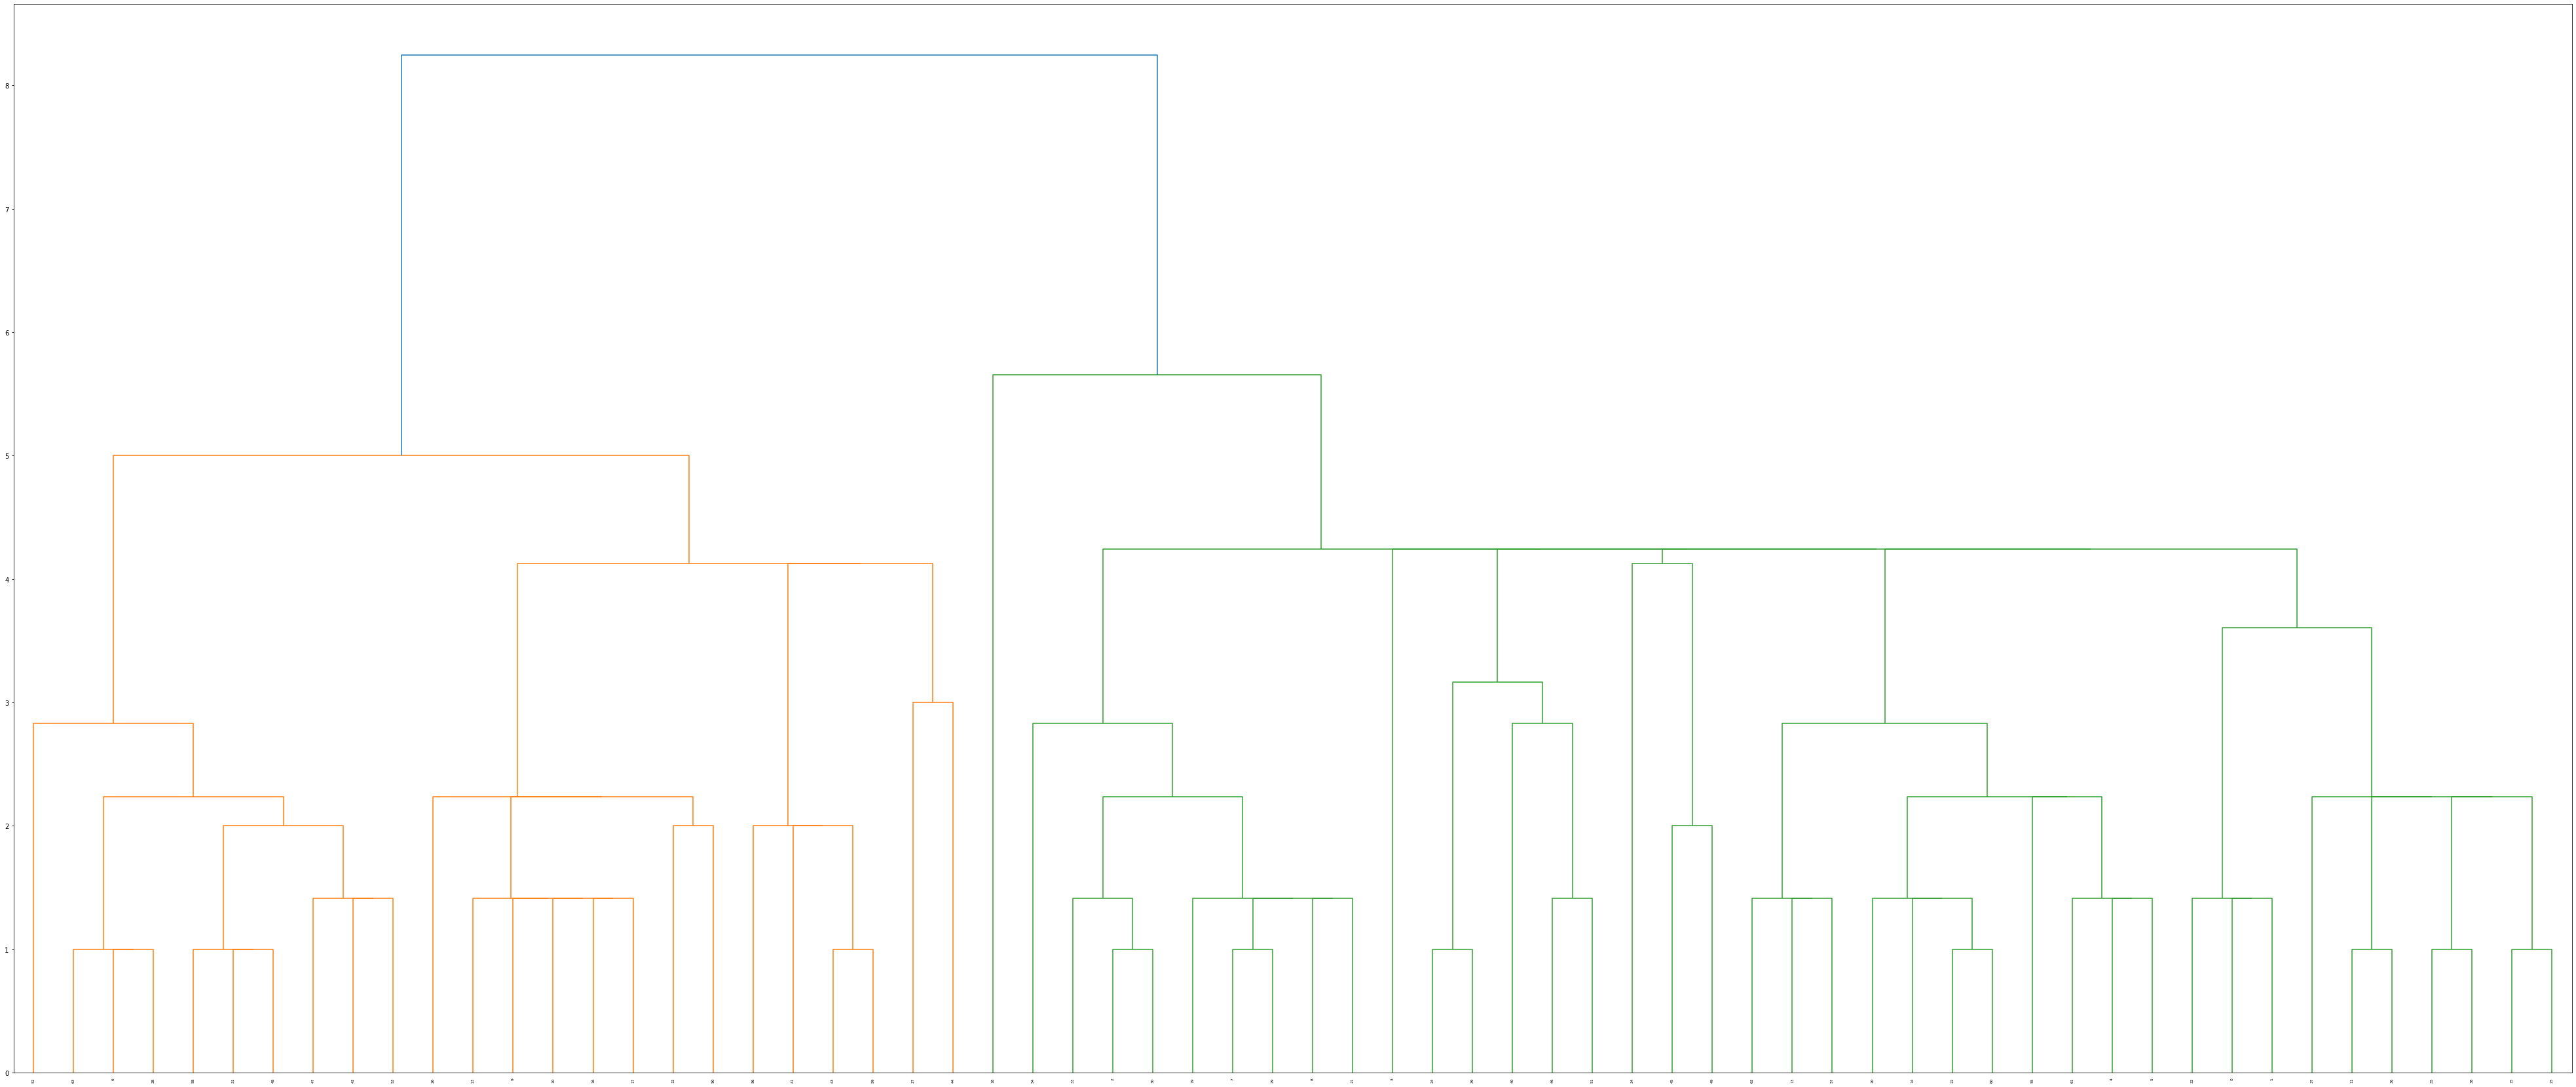

In [342]:
single_d=pd.DataFrame.from_dict(single)
z1 = sch.linkage(single_d.T)
plt.figure(figsize=(70,30))
den=sch.dendrogram(z1)

Dendrogram Plot for Complete linkage

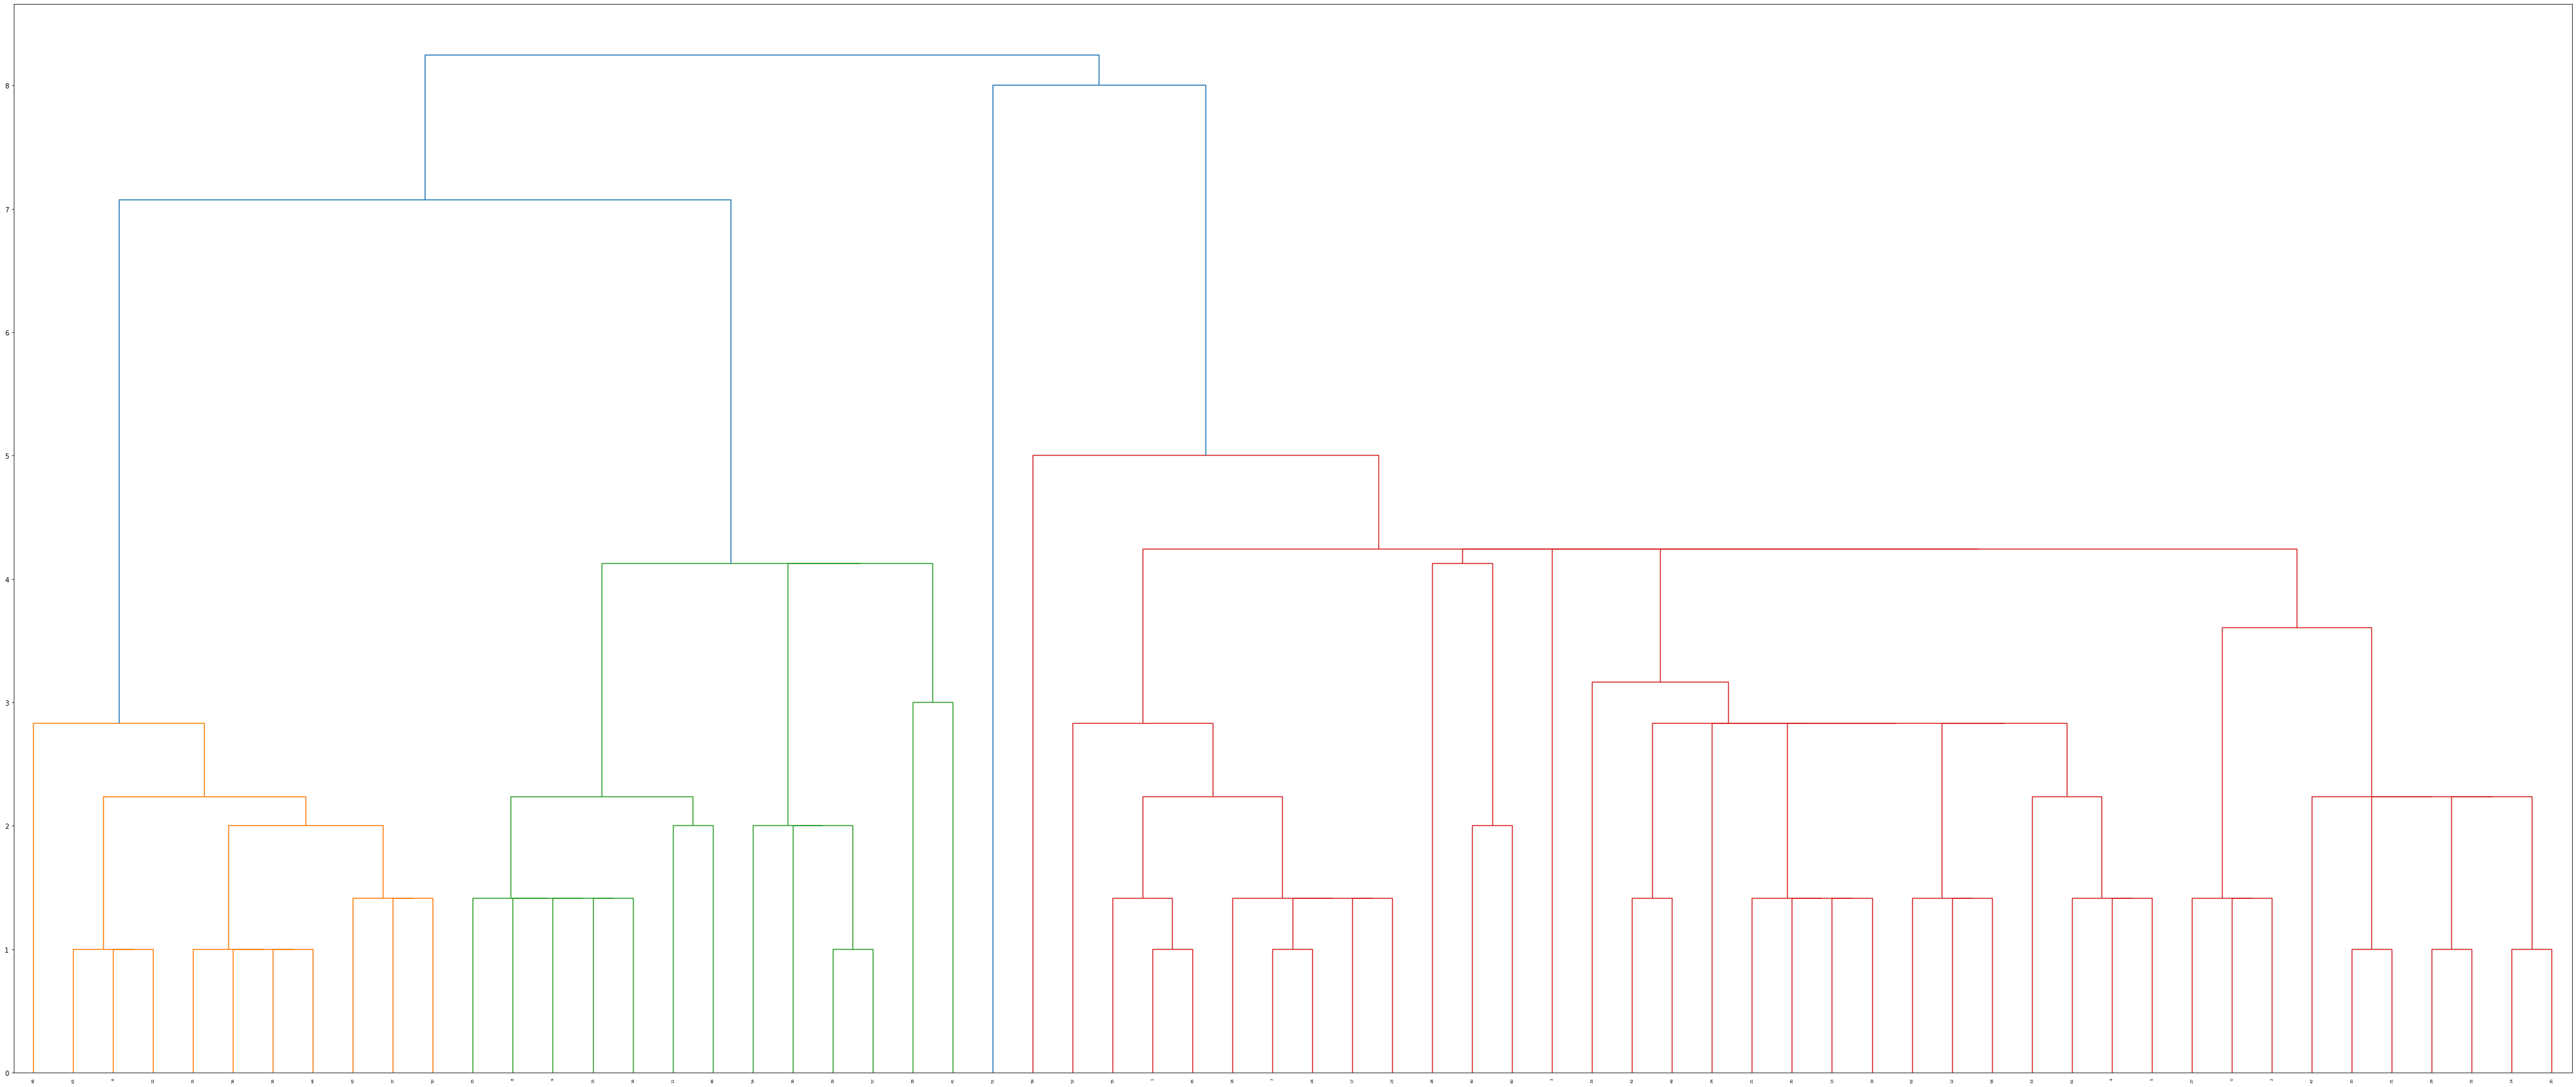

In [341]:
complete_d=pd.DataFrame.from_dict(complete)
z2 = sch.linkage(complete_d.T)
plt.figure(figsize=(70,30))
den=sch.dendrogram(z2)

Dendrogram Plot for Average linkage

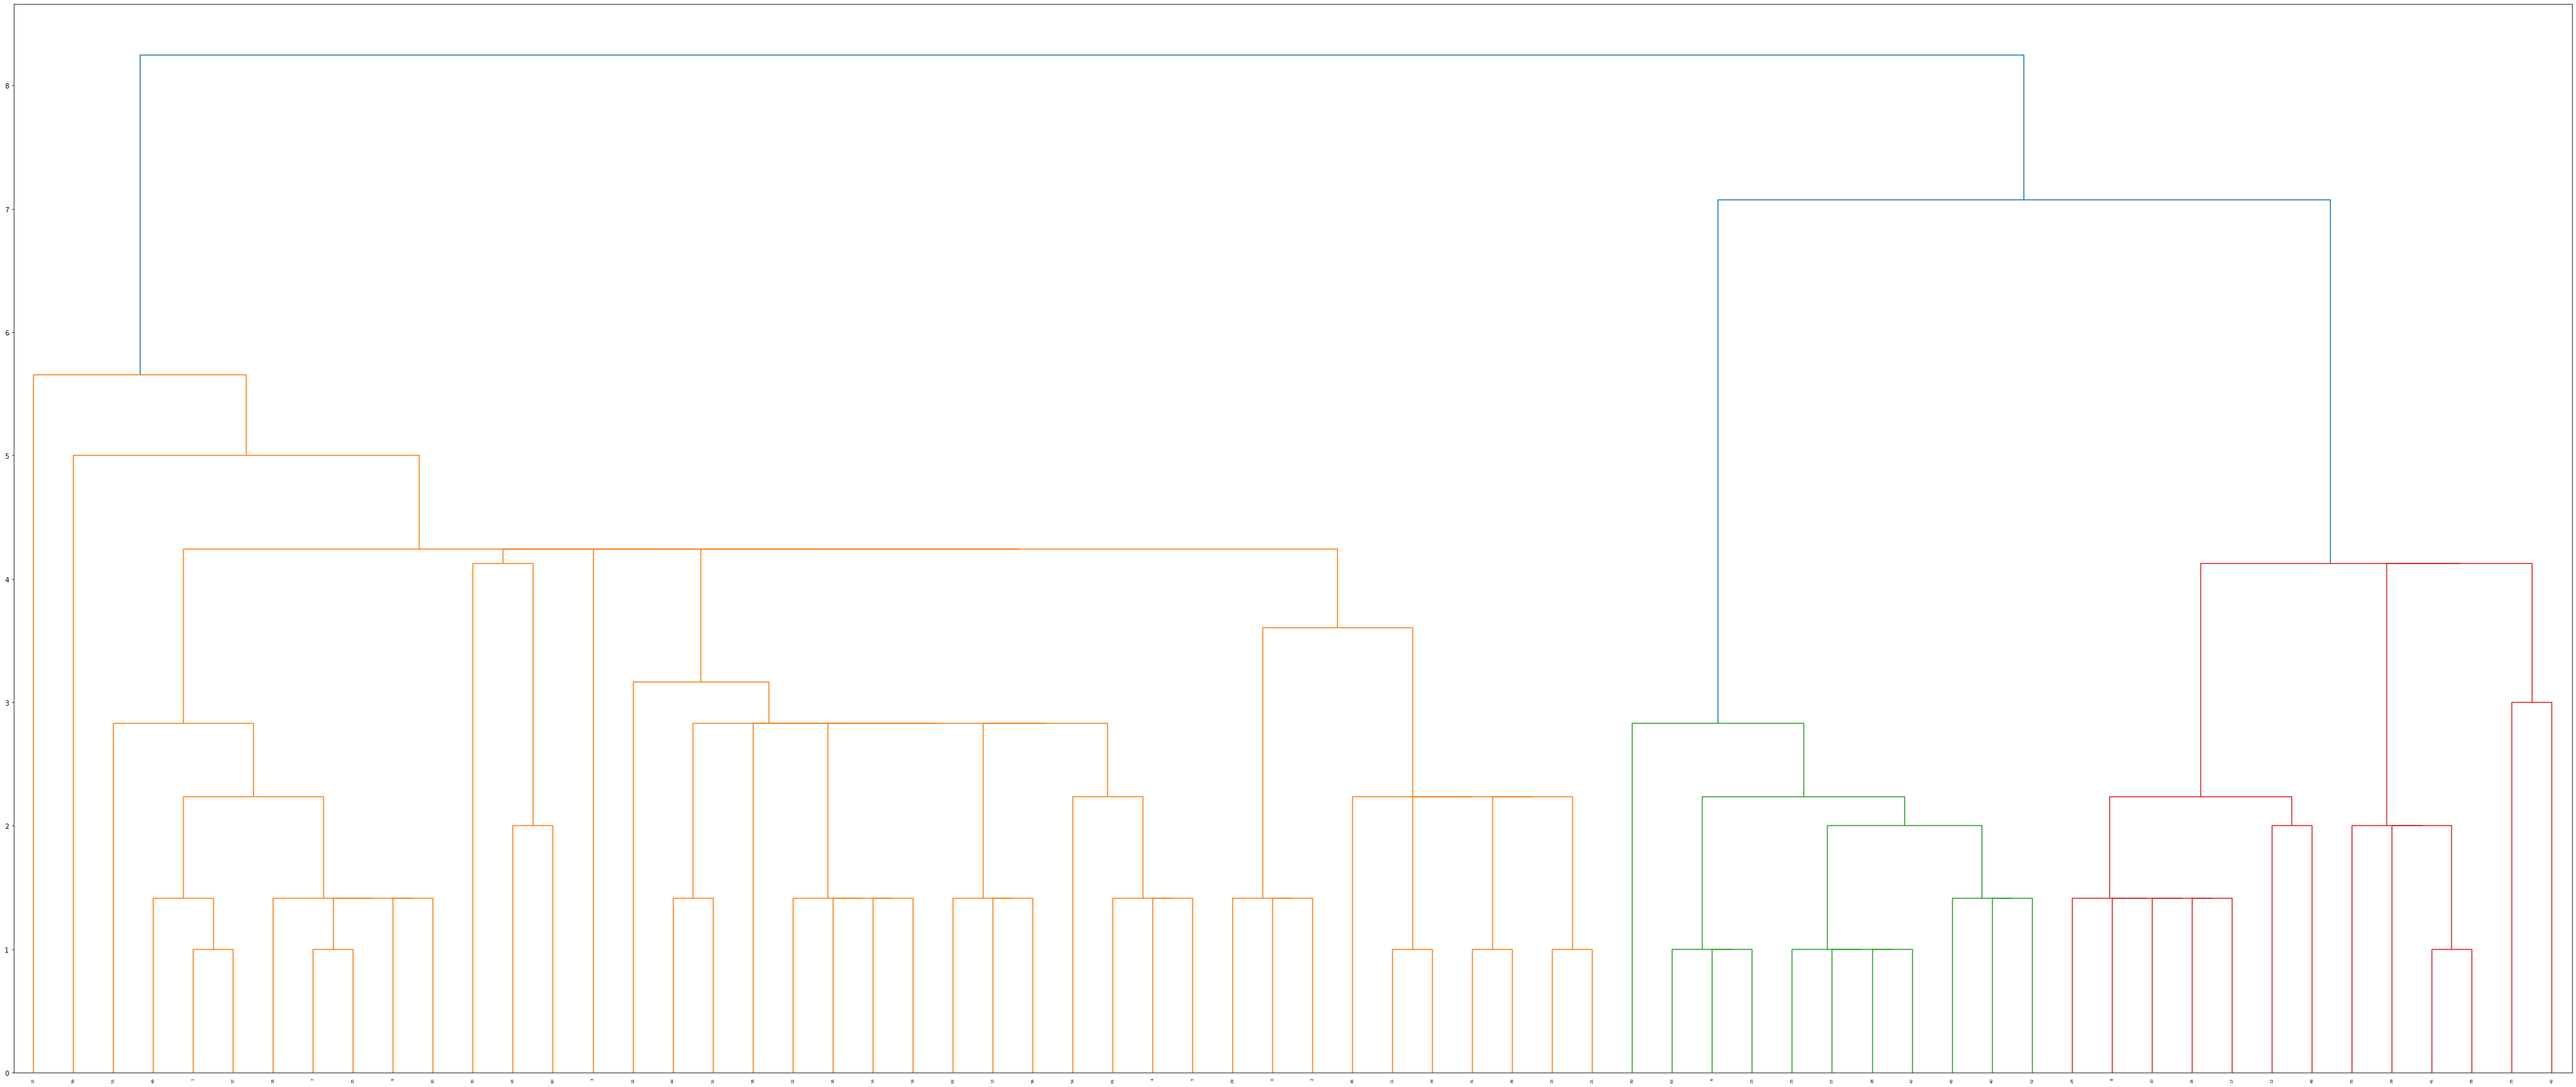

In [343]:
average_d=pd.DataFrame.from_dict(average)
z3 = sch.linkage(average_d.T)
plt.figure(figsize=(70,30))
den=sch.dendrogram(z3)

Dendrogram Plot for Centroid linkage

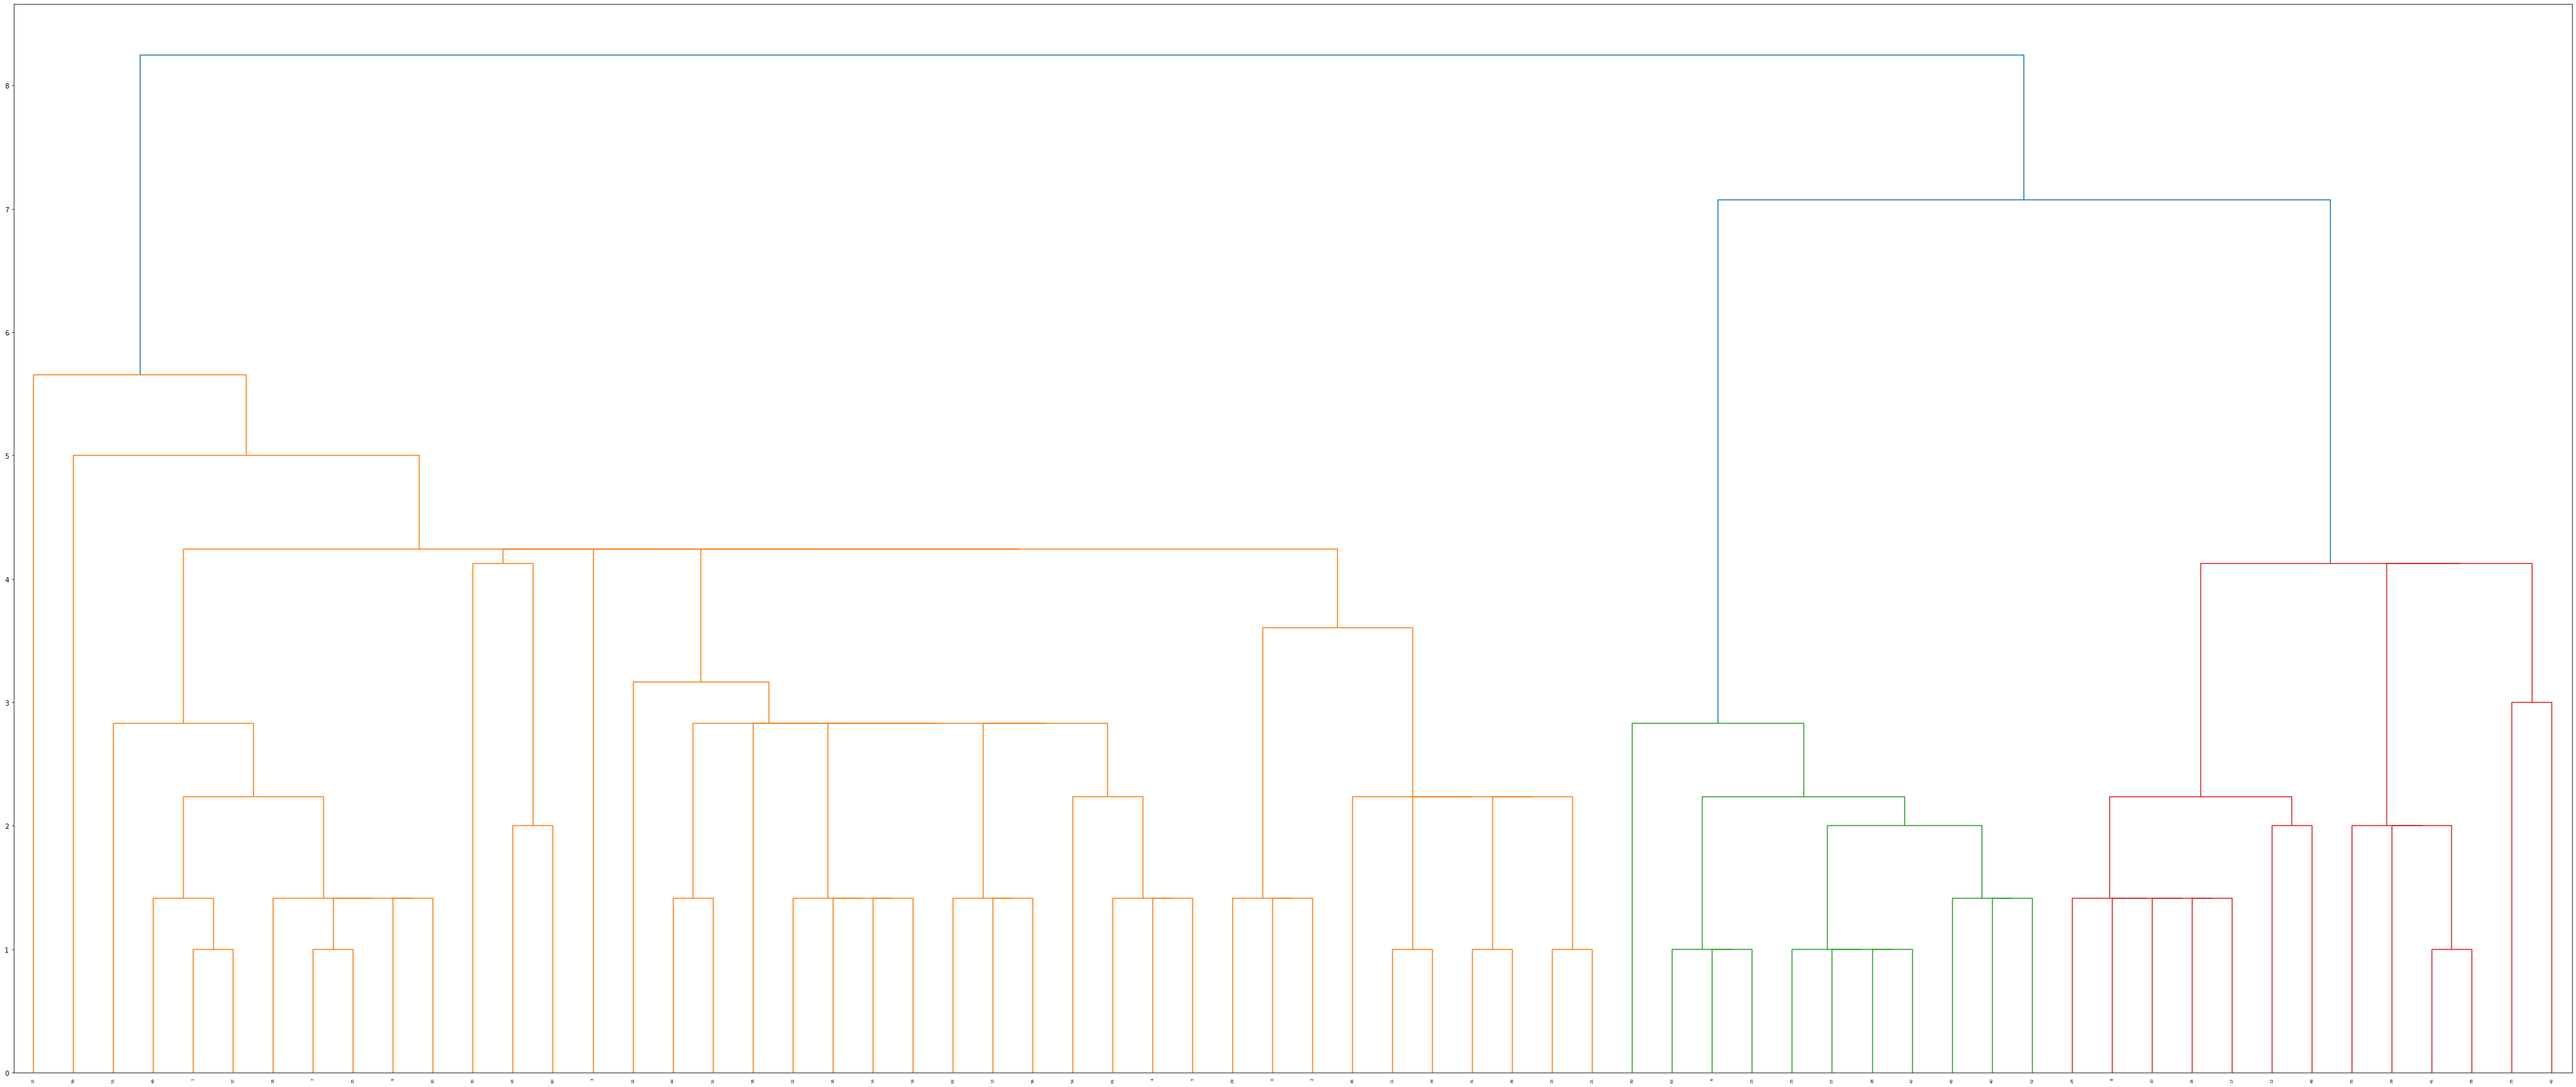

In [344]:
centroid_d=pd.DataFrame.from_dict(centroid)
z4 = sch.linkage(centroid_d.T)
plt.figure(figsize=(70,30))
den=sch.dendrogram(z4)